In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from scipy import signal
%matplotlib inline

# If you want a style choose one
plt.style.use('Solarize_Light2')
#plt.style.use('tableau-colorblind10')
NF_ORANGE = '#ff5a36'
NF_BLUE = '#163251'


df = pd.read_csv('data\da_prices\GUI_ENERGY_PRICES_202412312300-202512312300_UTC.csv')
df.head()

,MTU (CET/CEST),Area,Sequence,Day-ahead Price (EUR/MWh),MTU (CET/CEST) Start,MTU (CET/CEST) End,SummerIndicator,MTU (CET/CEST) End UTC
0,01/01/2025 00:00:00 - 01/01/2025 00:15:00,BZN|DE-LU,Sequence Sequence 1,2.16,01/01/2025 00:00:00,2025-01-01T00:15,CET,2024-12-31T23:15
1,01/01/2025 00:15:00 - 01/01/2025 00:30:00,BZN|DE-LU,Sequence Sequence 1,2.16,01/01/2025 00:15:00,2025-01-01T00:30,CET,2024-12-31T23:30
2,01/01/2025 00:30:00 - 01/01/2025 00:45:00,BZN|DE-LU,Sequence Sequence 1,2.16,01/01/2025 00:30:00,2025-01-01T00:45,CET,2024-12-31T23:45
3,01/01/2025 00:45:00 - 01/01/2025 01:00:00,BZN|DE-LU,Sequence Sequence 1,2.16,01/01/2025 00:45:00,2025-01-01T01:00,CET,2025-01-01T00:00
4,01/01/2025 01:00:00 - 01/01/2025 01:15:00,BZN|DE-LU,Sequence Sequence 1,1.60,01/01/2025 01:00:00,2025-01-01T01:15,CET,2025-01-01T00:15


In [4]:
part_df = df[df['MTU (CET/CEST) End UTC'] >= '2025-12-01T00:00']
ts = (
    part_df
    .set_index("MTU (CET/CEST) End UTC")
    ["Day-ahead Price (EUR/MWh)"]
)

# Converting ts into Pandas DataFrame
ts_df = pd.DataFrame(ts)

ts_df.head()

,Day-ahead Price (EUR/MWh)
MTU (CET/CEST) End UTC,
2025-12-01T00:00,84.34
2025-12-01T00:15,90.79
2025-12-01T00:30,85.05
2025-12-01T00:45,85.46
2025-12-01T01:00,82.79


Text(0.5, 1.0, 'Day-Ahead Energy Prices in December 2025')

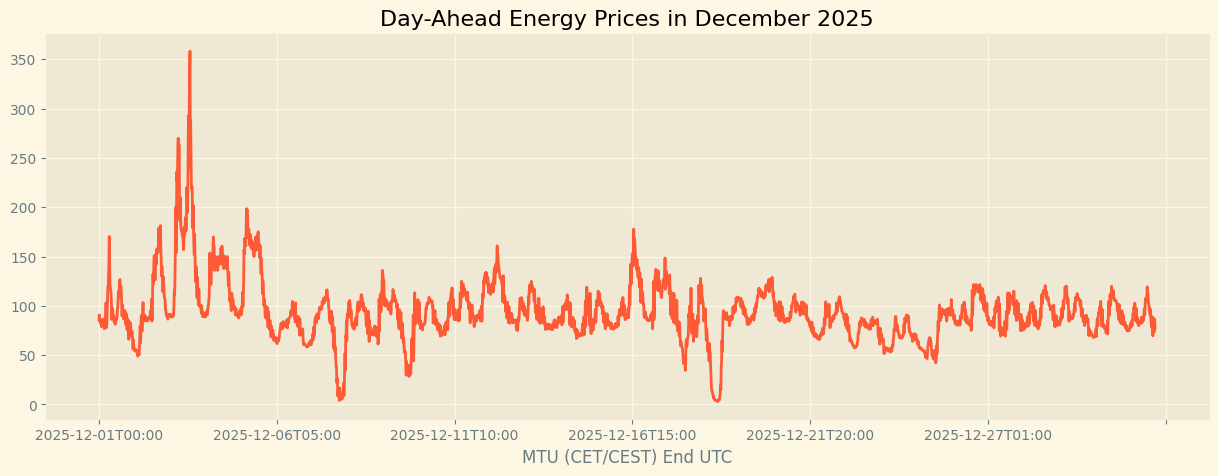

In [6]:
ts_df['Day-ahead Price (EUR/MWh)'].plot(figsize=(15, 5), color=NF_ORANGE)
plt.title('Day-Ahead Energy Prices in December 2025')